# Fase 1: Exploración y limpieza
## 1. Exploración Inicial:

In [360]:
import pandas as pd
import numpy as np

In [361]:
df_flight = pd.read_csv("Customer Flight Activity.csv")
df_flight.head()

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
0,100018,2017,1,3,0,3,1521,152.0,0,0
1,100102,2017,1,10,4,14,2030,203.0,0,0
2,100140,2017,1,6,0,6,1200,120.0,0,0
3,100214,2017,1,0,0,0,0,0.0,0,0
4,100272,2017,1,0,0,0,0,0.0,0,0


In [362]:
df_history = pd.read_csv("Customer Loyalty History.csv")
df_history.head()

,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
0,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN
1,549612,Canada,Alberta,Edmonton,T3G 6Y6,Male,College,NaN,Divorced,Star,3839.61,Standard,2016,3,NaN,NaN
2,429460,Canada,British Columbia,Vancouver,V6E 3D9,Male,College,NaN,Single,Star,3839.75,Standard,2014,7,2018.0,1.0
3,608370,Canada,Ontario,Toronto,P1W 1K4,Male,College,NaN,Single,Star,3839.75,Standard,2013,2,NaN,NaN
4,530508,Canada,Quebec,Hull,J8Y 3Z5,Male,Bachelor,103495.0,Married,Star,3842.79,Standard,2014,10,NaN,NaN


In [ ]:
# Primero, uno las tablas con un merge, por la columna que tienen en común: Loyalty Number.

df_final = df_flight.merge(df_history, on='Loyalty Number', how='outer') # Uso outer join porque nos interesa conocer todos los registros de ambas tablas, independientemente de si hay coincidencias o no.
df_final.head() # Para que nos muestre las primeras 5 filas del df

In [ ]:
df_final.tail() # Muestra las últimas 5 filas del df

In [ ]:
df_final.sample(5) # Muestra una muestra aleatoria

In [ ]:
df_final.columns # Para que me enseñe las columnas del df

In [ ]:
df_final.shape # Me muestra el número de filas y de columnas

In [ ]:
df_final.info() ## me hago una idea de los datos que tenemos: 405624, están en todas las columnas salvo en 2.
## Vemos que hay nulos en las columnas 'salary´, 'cancellation year' y 'cancellation month'
## Vemos que las columnas 'Cancellation Year' y 'Cancellation Month' son float y deberían ser integer

In [ ]:
df_final.select_dtypes(include=[object]) # Comprobamos que el postal code es un object que se refiere a Canadá.

In [ ]:
df_final.describe().T
# COUNT: el número de observaciones no nulas
# MEAN: la media
# STD: mide la dispersión
# MIN: valor mínimo VS. MAX: valor máx
# 25%: valor por debajo del cual se encuentran el 25% de los datos de esa columna VS de 75% valor por debajo del cual se encuentra el 75% de los datos de esa columna
# 50%: valor que coincide con la mediana: divide el conjunto de datos en 2 mitades iguales

- #### Algunas observaciones:
El mes donde más actividades de vuelo han habido ha sido el 6,5, es decir la segunda quincena de junio, posiblemente coincide con las vacaciones de verano
El valor de los puntos que el cliente ha usado de media durante el mes es de 2 dólares (parece un poco bajo)

In [ ]:
# Ahora hacemos lo mismo para ver las columnas de tipo object
df_final.describe(include = 'object').T
#Vemos que todas las entradas son de CANADÁ
## UNIQUE: nos dice la cantidad de números únicos: son datos de Canadá
## TOP: nos dice el valor más común: 11 provincias diferentes, la más frecuente Ontario, con 130896 veces se repite

In [169]:
df_final['Marital Status'].unique() # Quiero ver los valores únicos de la columna Marital Status

array(['Married', 'Single', 'Divorced'], dtype=object)

In [170]:
df_final['Loyalty Card'].unique() # Son los 3 tipos de tarjetas de lealtad que hay. 

array(['Aurora', 'Nova', 'Star'], dtype=object)

In [171]:
df_final['Enrollment Type'].unique() # la gran mayoría se inscribieron de tipo standard, no con la promoción de 2018

array(['Standard', '2018 Promotion'], dtype=object)

In [ ]:
df_final['Education'].value_counts() # para ver en qué se divide Education

In [368]:
df_final['Loyalty Number'].nunique() ## Hay 16737 valores únicos

16737

In [ ]:
df_final['Loyalty Number']

## 2. Limpieza de datos

In [ ]:
# Ahora voy a ver si hay duplicados
df_final.duplicated().sum() # hay 1864 filas duplicadas

In [ ]:
df_final[df_final.duplicated()] # Me muestra el duplicado, la copia (ie: 937, es porque hay un original que es 936)
# El keep = False me enseña tanto el original como la copia

In [371]:
# Quiero borrar las filas que están duplicadas
df_final = df_final.drop_duplicates(keep=False) 
print(df_final.duplicated().sum()) ## Verifico que se han eliminado todos los duplicados

0


In [381]:
# Veo la cantidad de nulos que hay en cada columna
nulos = df_final.isnull().sum()
nulos
# Las 3 columnas considero que son importantes, por lo que se quedan.

Loyalty Number                 0
Year                           0
Month                          0
Flights Booked                 0
Flights with Companions        0
Total Flights                  0
Distance                       0
Points Accumulated             0
Points Redeemed                0
Dollar Cost Points Redeemed    0
Country                        0
Province                       0
City                           0
Postal Code                    0
Gender                         0
Education                      0
Salary                         0
Marital Status                 0
Loyalty Card                   0
CLV                            0
Enrollment Type                0
Enrollment Year                0
Enrollment Month               0
Cancellation Year              0
Cancellation Month             0
dtype: int64

In [ ]:
## Al ser variables numéricas tenemos que ver el porcentaje de nulos que representa:
df_final.shape[0]
porcentaje_nulos = df_final.isnull().sum()/df_final.shape[0]*100 # calculo el porcentaje de nulos
porcentaje_nulos.sort_values(ascending=False) # ordeno el porcentaje de nulos de mayor a menor

In [ ]:
# Quiero ver las columnas numéricas que tienen nulos
columnas_numericas_con_nulos = df_final[df_final.columns[df_final.isnull().any()]].select_dtypes(include = "number").columns 
columnas_numericas_con_nulos

Index([], dtype='object')

In [383]:
# Vemos la distribución de los nulos por categorías
for col in columnas_numericas_con_nulos:
    print(f"La distribución de las categorías (incluyendo nulos) para la columna", col)
    display(df_final[col].value_counts(dropna=False, normalize=True) * 100)  # Convertimos a porcentaje
    print("........................")

In [ ]:
# Como son variables numéricas y hay un alto % de nulos, vamos a imputar esos nulos con iterative imputer:

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [ ]:
# Vemos que en las 3 hay un gran porcentaje alto de nulos: tenemos que imputarlos con técnicas avanzadas:
imputer_iter = IterativeImputer(max_iter = 100, random_state = 42) # max_iter es el número de veces que queremos que repita la predicción

df_final['Cancellation Month'] = imputer_iter.fit_transform(df_final[['Cancellation Month']]) #lo aplico a las 3 columnas
df_final['Salary'] = imputer_iter.fit_transform(df_final[['Salary']])
df_final['Cancellation Year'] = imputer_iter.fit_transform(df_final[['Cancellation Year']])
# lo que hace el robot (imputer_iter) es ver qué dato es el que más sentido tiene meter ahí, se centra sobre todo en las correlaciones 

df_final.isnull().sum() #Verifico la cantidad de valores nulos que hay en cada columna

In [ ]:
# Ahora, sin nulos, sí puedo cambiar el tipo de dato de las dos columnas 'Cancellation Month' y 'Cancellation Year':
df_final['Cancellation Month'] = df_final['Cancellation Month'].astype(int) # cambiamos mes y año de float a int
df_final['Cancellation Year'] = df_final['Cancellation Year'].astype(int)
df_final.info()

In [379]:
## Guardo el csv limpio.
df_final.to_csv("df_final_limpio.csv", index=False)

# Fase 2: Visualización

### 1. ¿Cómo se distribuye la cantidad de vuelos reservados por mes durante cada año?

In [185]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)

In [ ]:
df_final.head(2) # Primero, miro mi df

In [ ]:
vuelos_por_mes = df_final.groupby(["Year", "Month"])["Total Flights"].sum().reset_index() # Agrupamos por año y mes, sumando la cantidad total de vuelos
vuelos_por_mes

In [ ]:
# Usamos un gráfico de líneas para variables numéricas
sns.lineplot(data = vuelos_por_mes, x="Month", y="Total Flights", hue="Year") ## coge los datos de vuelos_por_mes, donde x es el mes e 'y' los vuelos totales
plt.xlabel("Mes") # Ponemos la etiqueta 'mes' al eje x
plt.ylabel("Cantidad de vuelos reservados") # Ponemos la etiqueta al eje 'y'
plt.title("Distribución de vuelos reservados por mes y año")
plt.legend(title = "Año") # Ponemos nombre a la leyenda
plt.show()

# Observaciones:
## La mayoría de vuelos se produjeron entre junio y agosto, con un pico en julio, lo que coincide con las vacaciones de verano
## También hay un reptunte en el mes de diciembre, coincidiendo con las vacaciones de Navidad
## La tendencia se repite ambos años aunque sí observamos un aumento del número de vuelos reservados de abril a diciembre

### 2. ¿Existe una relación entre la distancia de los vuelos y los puntos acumulados por los clientes?

In [ ]:
df_final.head(2) # Primero, miro mi df

In [ ]:
# 1. Con Scatterplot:

sns.scatterplot(data = df_final, x = 'Distance', y = 'Points Accumulated')
plt.title("Relación entre la distancia de los vuelos y los puntos acumulados")
plt.xlabel("Distancia")
plt.ylabel("Puntos acumulados")
plt.show()
# Respuesta: Sí, a mayor distancia, mayor número de puntos acumulados. 
## Es decir, los clientes que viajan más lejos acumulan más puntos

In [ ]:
# 2. Con heatmap:

vuelos_puntos_corr = df_final.select_dtypes(include=['number']).corr()
vuelos_puntos_corr
plt.figure(figsize=(10, 8))  # Tamaño de la figura
sns.heatmap(vuelos_puntos_corr, cmap='coolwarm', fmt='.2f', linewidths=0.5) #grosor linea
plt.show()
## Hay una relación muy alta entre la distancia de los vuelos y los puntos acumulados por los clientes

### 3. ¿Cuál es la distribución de los clientes por provincia o estado? Es decir, poder ver cuántos clientes hay en cada provincia.

In [215]:
df_final.head(1)

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
0,100018,2017,1,3,0,3,1521,152.0,0,0,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.2,Standard,2016,8,2016,6


In [ ]:
# Tenemos que agrupar por Provincia y contamos los valores únicos de 'Loyalty Number' para que no cuente los repetidos
clientes_por_provincia = df_final.groupby('Province')['Loyalty Number'].nunique().reset_index()
clientes_por_provincia

In [ ]:
# Elijo representación en barras:
plt.bar(x=clientes_por_provincia['Province'], height=clientes_por_provincia['Loyalty Number']) # el eje x van a ser mis categorias y en el 'y' la cantidad de clientes
plt.bar(x=clientes_por_provincia['Province'], height=clientes_por_provincia['Loyalty Number'], color='pink', edgecolor = 'red') # lo pongo bonito
plt.xlabel('Provincia')
plt.ylabel('Cantidad de clientes')
plt.title('Cantidad de clientes por provincia')
plt.xticks(rotation=45); # roto las etiquetas para que quepan
plt.show() # Muestro el gráfico

# Observaciones: La mayoría de mis clientes son de Ontario, seguido de la provincia de British Columbia y en tercer lugar de Québec.

### 4. Compara el salario promedio por nivel educativo.

In [ ]:
df_final.head(2) # Miro el df para ver las columnas 'Salary' y 'Education'

In [ ]:
## Hago un filtrado para quedarme solo con los valores Loyalty Number que no se repitan.
df_filtrado = df_final[['Education', 'Loyalty Number', 'Salary']] # Me creo un df nuevo donde solo utilizo las columnas que me interesan
df_filtrado.drop_duplicates(inplace = True) # elimino las filas duplicadas de ese df_filtrado
df_filtrado

In [ ]:
salario_promedio = df_filtrado.groupby('Education')['Salary'].mean().reset_index().round(2) # Agrupo por educación y hago la media del salario (redondeo 2 decimales)
salario_promedio

,Education,Salary
0,Bachelor,72451.42
1,College,79247.59
2,Doctor,178650.18
3,High School or Below,61108.66
4,Master,103723.33


In [ ]:
# Creo un gráfico de barras
plt.bar(salario_promedio['Education'], salario_promedio['Salary'], color='pink', edgecolor = 'red')
plt.xlabel('Nivel educativo')
plt.ylabel('Salario medio')
plt.title('Salario medio por nivel educativo')
plt.xticks(rotation=45)  # Roto las etiquetas para que no se junten
plt.show() # Muestro el gráfico

# Observaciones: 
# Mis clientes con mayor salario son aquellos con el grado de Doctor.
# Mis clientes que menos cobran son lo que solo tienen el título de Bachiller.

### 5. ¿Cuál es el porcentaje de clientes por cada tipo de tarjeta de fidelidad?

In [ ]:
df_final.head(2) # Miro el df para ver las columnas 'Loyalty Number' y 'Loyalty Card'

In [ ]:
# Hago un filtrado para quedarme solo con los Loyalty Number que no se repitan y me creo ese df
df_filtrado2 = df_final[['Loyalty Number', 'Loyalty Card']] # me creo un df con solo las columnas que me interesan
df_filtrado2.drop_duplicates(inplace=True) # Elimino los duplicados de esas columnas
df_filtrado2

In [433]:
# Calculo el porcentaje de clientes por cada tipo de tarjeta.
clientes_totales = df_filtrado2['Loyalty Number'].count() # Cuento el número total de clientes

# Ahora agrupo por tipo de tarjeta y cuento los clientes únicos
clientes_por_tarjeta = df_filtrado2.groupby('Loyalty Card')['Loyalty Number'].nunique().reset_index() # cuento la cantidad de clientes por tipo de tarjeta
clientes_por_tarjeta['%'] = (clientes_por_tarjeta['Loyalty Number'] / clientes_totales) * 100 # Me creo la columna 'Porcentaje' y calculo el % de clientes con cada tip de tarjeta

clientes_por_tarjeta
clientes_totales

16709

In [ ]:
# Uso el gráfico de quesitos
plt.pie(clientes_por_tarjeta['%'], labels=clientes_por_tarjeta['Loyalty Card'], autopct='%1.1f%%', colors=['LightPink', 'HotPink', 'DeepPink'])
plt.title('Porcentaje de clientes por tipo de tarjeta')
plt.axis('equal')  # Para que el gráfico sea circular
plt.show()

# Observaciones: 
## El 45,7%, es decir, casi la mitad de los clientes tienen la tarjeta Star

### 6. ¿Cómo se distribuyen los clientes según su estado civil y género? Es decir, una gráfica donde vea a mis clientes separados por la categoría de estado civil y que en cada categoría vea cuáles son hombres y cuales mujeres.

In [ ]:
# Arupo por 'Marital Status' y 'Gender' y de cada grupo le pido que me dé los 'Loyalty Number' únicos
resultado2 = df_final.groupby(["Marital Status", "Gender"])["Loyalty Number"].nunique().reset_index()
resultado2

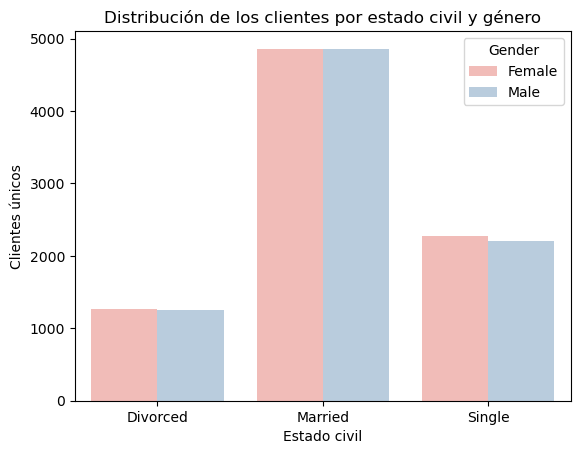

In [438]:
# Utilizo un gráfico de barras agrupado, que nos permite separar los géneros por el parámetro 'hue = Gender'
sns.barplot(x='Marital Status', y='Loyalty Number', hue='Gender', data=resultado2, palette='Pastel1')

plt.xlabel('Estado civil') # en el eje x van las categorías
plt.ylabel('Clientes únicos') # en el eje y van los valores
plt.title('Distribución de los clientes por estado civil y género')

plt.show() # Enseño el gráfico

# La gran mayoría de mis clientes, tanto hombres como mujeres están casados